In [1]:
import numpy as np
import csv
from ahrs.ahrs.filters import Mahony

%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from pyquaternion import Quaternion

# Ground Truth UR10e

# IMU FSM-9

In [2]:
#Data gathering
#f_name = '/home/kuli/Desktop/WeAreVR/IMU_test_data/r90l90l90r90.txt'
#f_name = '/home/kuli/Desktop/WeAreVR/IMU_test_data/90pu90pd90pd90pu.txt'
f_name = '/home/kuli/Desktop/WeAreVR/IMU_test_data/random_flat_tilted_start.txt'

with open(f_name , 'r') as f:
    # Use the csv library to read the file and parse it into a list of lists
    csv_reader = csv.reader(f, delimiter=';')
    data = []
    row = next(csv_reader)  # Read the first row
    while row:  # Continue reading until a blank row is encountered
        data.append(row)  # Append the row to the data list
        try:
            row = next(csv_reader)  # Read the next row
        except StopIteration:  # Stop reading if there are no more rows
            break

# Convert the list of strings to a NumPy array of floats
print(data[0])
data = np.array(data[2:]).astype(float)
ypr_columns = [1,2,3]
acc_columns = [4,5,6]
gyro_columns = [7,8,9]
mag_columns = [10,11,12]
ypr_data = data[:, ypr_columns]
acc_data = data[:, acc_columns]
gyro_data = data[:, gyro_columns]
mag_data = data[:, mag_columns]
print("Yaw Pitch Rol:")
print(ypr_data)
print("Acc:")
print(acc_data)
print("Gyro:")
print(gyro_data) 
print("Mag:")
print(mag_data) 

['sequenceNumber', ' roll', ' pitch', ' yaw', ' (accel:) x', ' y', ' z', ' (gyro:) X', ' Y', ' Z', ' (mag:) X', ' Y', ' Z ']
Yaw Pitch Rol:
[[  -6.2073   30.0687 -145.0663]
 [  -6.196    30.0663 -145.1096]
 [  -6.1896   30.0738 -145.1531]
 ...
 [  17.7909    5.9014 -131.4911]
 [  17.6565    5.789  -131.7819]
 [  17.5223    5.6792 -132.0949]]
Acc:
[[ 4.8555  0.876  -8.4609]
 [ 4.8584  1.0303 -8.3555]
 [ 4.8174  0.915  -8.0732]
 ...
 [ 0.3535 -3.6729 -9.293 ]
 [ 0.5361 -3.209  -9.7305]
 [ 0.7432 -2.7969 -9.9775]]
Gyro:
[[ 0.06  0.   -0.09]
 [ 0.07  0.02 -0.09]
 [ 0.05  0.01 -0.08]
 ...
 [-0.24 -0.43 -0.51]
 [-0.24 -0.45 -0.57]
 [-0.23 -0.43 -0.58]]
Mag:
[[-0.38  0.09  0.35]
 [-0.38  0.09  0.35]
 [-0.39  0.09  0.34]
 ...
 [-0.1   0.33  0.15]
 [-0.11  0.33  0.15]
 [-0.11  0.32  0.15]]


In [3]:
#Computing
quaternions_premade = Mahony(gyr=gyro_data, acc=acc_data, mag = mag_data, frequency = 125).Q   # Using IMU with sample rate 8ms (default)
print(quaternions_premade)


[[ 0.25192556  0.41336877 -0.87236517  0.06810866]
 [ 0.2520226   0.41372105 -0.87216304  0.06819919]
 [ 0.25198575  0.41403866 -0.87203258  0.06807609]
 ...
 [-0.01336749  0.20280554 -0.9668739   0.15442176]
 [-0.01468455  0.20512404 -0.96657125  0.15312905]
 [-0.01468455  0.20512404 -0.96657125  0.15312905]]


In [4]:
num_samples = np.shape(gyro_data)[0]
orientation = Mahony()
quaternions = np.tile(quaternions_premade[0], (num_samples, 1)) # Allocate for quaternions
for t in range(1, num_samples):
    quaternions[t] = orientation.updateMARG(quaternions[t-1], gyr=gyro_data[t], acc=acc_data[t], mag=mag_data[t], dt = 1./125. )
print(quaternions)

[[ 0.25194848  0.4137583  -0.87216315  0.06824567]
 [ 0.25204367  0.4141098  -0.87196169  0.06833655]
 [ 0.25200515  0.41442675 -0.87183184  0.06821372]
 ...
 [-0.01335683  0.20276516 -0.96688254  0.15442164]
 [-0.01467396  0.20508375 -0.96657997  0.15312897]
 [-0.01467396  0.20508375 -0.96657997  0.15312897]]


In [5]:
#Visualisation
for q in quaternions:
    print(q)
print(np.shape(quaternions))

[ 0.25194848  0.4137583  -0.87216315  0.06824567]
[ 0.25204367  0.4141098  -0.87196169  0.06833655]
[ 0.25200515  0.41442675 -0.87183184  0.06821372]
[ 0.25195477  0.41476863 -0.8717204   0.06774458]
[ 0.25205806  0.41510192 -0.87158306  0.06708283]
[ 0.25205288  0.41510849 -0.87162001  0.06657964]
[ 0.25181215  0.41493818 -0.87180574  0.06611882]
[ 0.25144641  0.41486708 -0.87197633  0.06570607]
[ 0.25130082  0.41505265 -0.87195442  0.065381  ]
[ 0.25134978  0.41521961 -0.8718712   0.06524236]
[ 0.25139207  0.41534361 -0.87179236  0.06534369]
[ 0.2514041   0.41548687 -0.87169713  0.06565633]
[ 0.25141229  0.41540961 -0.87167588  0.06639177]
[ 0.25155132  0.41516589 -0.87168151  0.06730952]
[ 0.25170937  0.41494724 -0.87167553  0.06813922]
[ 0.25194581  0.41481729 -0.87161434  0.06883578]
[ 0.25213356  0.41470807 -0.87158184  0.06921694]
[ 0.25206125  0.41431908 -0.87177576  0.06936756]
[ 0.25194895  0.41391979 -0.87200837  0.06923541]
[ 0.25211965  0.41386812 -0.87202167  0.06875366]


[ 0.04315249 -0.7899432  -0.61165227 -0.00301868]
[ 0.03015928 -0.78694383 -0.61595766 -0.02014883]
[ 0.01776175 -0.78306854 -0.62060154 -0.03663206]
[ 0.00555649 -0.77821308 -0.62578672 -0.05238804]
[-0.00767445 -0.77246043 -0.63132422 -0.0683792 ]
[-0.02324498 -0.76672629 -0.63594329 -0.08465574]
[-0.03957657 -0.76155374 -0.63911797 -0.09998914]
[-0.05503284 -0.75667793 -0.64133198 -0.11446916]
[-0.06881621 -0.75219897 -0.64268937 -0.128107  ]
[-0.08112073 -0.74795175 -0.64346877 -0.14119327]
[-0.09257418 -0.74315921 -0.64426552 -0.15513331]
[-0.10293117 -0.73735795 -0.64552939 -0.17029456]
[-0.11275931 -0.73000803 -0.64755935 -0.1871911 ]
[-0.12298987 -0.72051335 -0.65036306 -0.2067895 ]
[-0.13438483 -0.70938389 -0.65302051 -0.22864695]
[-0.14644316 -0.69780545 -0.65473479 -0.25088707]
[-0.15883153 -0.68581835 -0.655413   -0.27360473]
[-0.17130976 -0.6736686  -0.65480329 -0.29674271]
[-0.18435093 -0.66170652 -0.65246263 -0.32008081]
[-0.19720176 -0.65034427 -0.64896702 -0.34206081]


[-0.08104683  0.54555624 -0.83410286  0.00849792]
[-0.08720796  0.54763761 -0.83204159  0.01395075]
[-0.09267934  0.54998661 -0.82979433  0.01914776]
[-0.09748184  0.55236441 -0.82752499  0.02435654]
[-0.10181594  0.55466785 -0.82528138  0.02979468]
[-0.10612506  0.55686626 -0.82303064  0.03546837]
[-0.11008948  0.55897999 -0.8207969   0.04140202]
[-0.11351289  0.56077134 -0.81877994  0.04743141]
[-0.11608267  0.56179237 -0.81737731  0.05299501]
[-0.1177036   0.56154884 -0.8169605   0.05817478]
[-0.11832734  0.55982698 -0.81767079  0.06329985]
[-0.11823018  0.55659639 -0.81946164  0.06859079]
[-0.11755278  0.55232239 -0.82199123  0.07383585]
[-0.11717331  0.54711139 -0.82499379  0.07952853]
[-0.1179001   0.5415832  -0.82795497  0.08530985]
[-0.11911445  0.53629716 -0.83081819  0.08909676]
[-0.12044384  0.53110914 -0.83377715  0.09073057]
[-0.12122404  0.5257598  -0.83695109  0.09162005]
[-0.12122661  0.51996014 -0.84047012  0.09249618]
[-0.1204113   0.51405147 -0.84416313  0.09295596]


In [6]:
def get_arrow(num, orientation):
    pitch = np.radians(orientation[num, 1])
    yaw = np.radians(orientation[num, 2])
    u = np.sin(yaw)*np.cos(pitch)
    v = np.cos(yaw)*np.cos(pitch)
    w = np.sin(pitch)
    return 0,0,0,u,v,w

def get_arrow_q(num, quaternions, InitialPerspectiveVector):
    u, v, w = Quaternion(quaternions[num]).rotate(InitialPerspectiveVector)
    return 0,0,0,u,v,w

def get_arrow_unwinded(num, quaternions, Vector):
    u_u, v_u, w_u = Quaternion(quaternions[num]).inverse.rotate(Vector)
    return 0,0,0,u_u,v_u,w_u


<IPython.core.display.Javascript object>


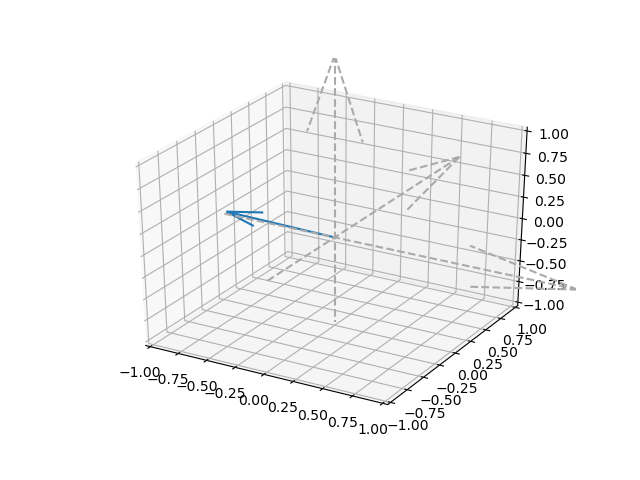

In [7]:
#Ground-Truth (Vector from sensor)
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

orientation = ypr_data

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
    
def update1(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1)
    Qui = ax.quiver(*get_arrow(num, orientation), length=1, normalize=True)

Qui = ax.quiver(*get_arrow(0, orientation), length=1, normalize=True)  
ani = FuncAnimation(fig, update1, fargs=(Qui, Qui), frames=range(0, np.shape(orientation)[0]), interval=0.1, blit=True, repeat = False)
plt.show()

<IPython.core.display.Javascript object>


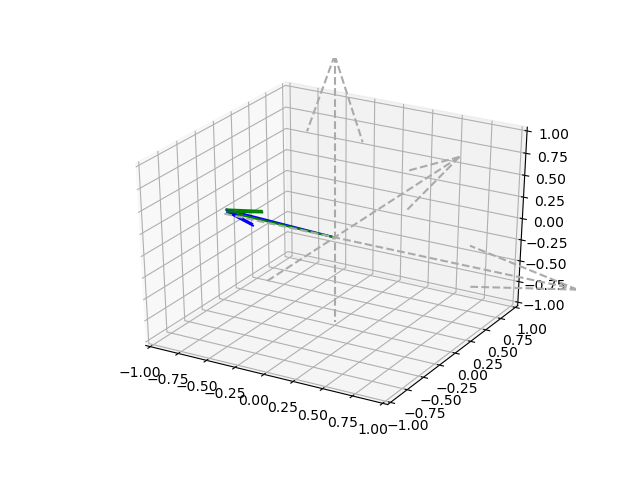

In [8]:
#Vector (q) from Mahony
%matplotlib notebook
%matplotlib notebook

WantToClear = 1
x0, y0, z0, u0, v0, w0 = get_arrow(0, orientation)
InitialPerspectiveVector = [1,0,0]
#
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')

def update2(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        x, y, z, u, v, w = get_arrow_q(num, quaternions, InitialPerspectiveVector)
    Qui = ax.quiver([x,x0], [y,y0], [z,z0], [u,u0], [v,v0], [w,w0], length=1, normalize=True, color = ['blue', 'green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['blue', 'green'])  
ani = FuncAnimation(fig, update2, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=2, blit=True, repeat = False)
plt.show()

In [ ]:
#Comparison Ground-Truth (Vector from sensor) and Mahony
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

orientation = ypr_data

x0, y0, z0, u0, v0, w0 = get_arrow(0, orientation)
InitialPerspectiveVector = [1,0,0]

#
fig, ax = plt.subplots(subplot_kw = dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color = '#aaaaaa',linestyle = 'dashed')
ax.quiver(0, -1, 0, 0, 3, 0, color = '#aaaaaa',linestyle = 'dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color = '#aaaaaa',linestyle = 'dashed')
    
    
def update3(num, Q, X):
    if (WantToClear):
        ax.clear()
        ax.quiver(-1, 0, 0, 3, 0, 0, color = '#aaaaaa',linestyle = 'dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color = '#aaaaaa',linestyle = 'dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color = '#aaaaaa',linestyle = 'dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        x, y, z, u, v, w = get_arrow(num, orientation)
        x_q, y_q, z_q, u_q, v_q, w_q = get_arrow_q(num, quaternions, InitialPerspectiveVector)
    Qui = ax.quiver([x,x_q,x0], [y,y_q,y0], [z, z_q,z0], [u, u_q,u0], [v,v_q,v0], [w,w_q,w0], length=1, normalize=True, color = ['red','blue', 'green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['red','green'])  
ani = FuncAnimation(fig, update3, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=2, blit=True, repeat = False)
plt.show()


In [ ]:
#Comparison Ground-Truth (Vector from sensor) and Mahony - plot
%matplotlib notebook
%matplotlib notebook

orientation = ypr_data

InitialPerspectiveVector = [1,0,0] 

full_frames = np.shape(quaternions)[0] 
zoom_frames = (100, 140)

data = np.zeros((full_frames, 6))
for i in range(0, full_frames):
    x, y, z, u, v, w = get_arrow(i, orientation)
    x_q, y_q, z_u, u_q, v_q, w_q = get_arrow_q(i, quaternions, InitialPerspectiveVector)
    data[i] = (u, v, w, u_q, v_q, w_q)

fig = plt.figure()
ax = plt.subplot(321)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[0,3]])
ax.legend(['u_df', 'u_q'])
ax = plt.subplot(323)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[1,4]])
ax.legend(['v_df', 'v_q'])
ax = plt.subplot(325)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[2,5]])
ax.legend(['w_df', 'w_q'])

ax = plt.subplot(322)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[0,3]])
ax.legend(['u_df', 'u_q'])
ax = plt.subplot(324)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[1,4]])
ax.legend(['v_df', 'v_q'])
ax = plt.subplot(326)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[2,5]])
ax.legend(['w_df', 'w_q'])

fig.show()

# Unwinding:

In [ ]:
#Unwinding the Ground-Truth (Vector from sensor) by the reverse of quaternion from Mahony
%matplotlib notebook
%matplotlib notebook


WantToClear = 1

orientation = ypr_data

x0, y0, z0, u0, v0, w0 = get_arrow(0, orientation)
InitialPerspectiveVector = [1,0,0]

#
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')

    
def update4(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        x, y, z, u, v, w = get_arrow(num, orientation)
        x_u, y_u, z_u, u_u, v_u, w_u = get_arrow_unwinded(num, quaternions, [u, v, w])
    Qui = ax.quiver([x,x_u,x0], [y,y_u,y0], [z, z_u,z0], [u, u_u,u0], [v,v_u,v0], [w,w_u,w0], length=1, normalize=True, color = ['red','blue', 'green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['red','green'])  
ani = FuncAnimation(fig, update4, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=2, blit=True, repeat = False)
plt.show()



In [ ]:
#Unwinding the Ground-Truth (Vector from sensor) by the reverse of quaternion from Mahony - plot
InitialPerspectiveVector = [1,0,0]

full_frames = np.shape(quaternions)[0] 
zoom_frames = (500, 640)

data = np.zeros((full_frames, 6))
for i in range(0, full_frames):
    x, y, z, u, v, w = get_arrow(i, orientation)
    x_u, y_u, z_u, u_u, v_u, w_u = get_arrow_unwinded(i, quaternions, [u, v, w])
    data[i] = (u, v, w, u_u, v_u, w_u)

fig = plt.figure()
ax = plt.subplot(321)
ax.set_ylim(-1, 1.2)
ax.plot(range(0, full_frames), data[:,[0,3]])
ax.legend(['u_df', 'u_u'])
ax = plt.subplot(323)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[1,4]])
ax.legend(['v_df', 'v_u'])
ax = plt.subplot(325)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[2,5]])
ax.legend(['w_df', 'w_u'])

ax = plt.subplot(322)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[0,3]])
ax.legend(['u_df', 'u_u'])
ax = plt.subplot(324)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[1,4]])
ax.legend(['v_df', 'v_u'])
ax = plt.subplot(326)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[2,5]])
ax.legend(['w_df', 'w_u'])

fig.show()

# IMU with robot arm

In [ ]:
import re

In [28]:
#Data gathering
f_name = '/home/kuli/Desktop/WeAreVR/Measurements/imu_position.csv'

with open(f_name , 'r') as f:
    # Use the csv library to read the file and parse it into a list of lists
    csv_reader = csv.reader(f, delimiter=';')
    data = []
    row = next(csv_reader)  # Read the first row
    while row:  # Continue reading until a blank row is encountered
        data.append(row)  # Append the row to the data list
        try:
            row = next(csv_reader)  # Read the next row
        except StopIteration:  # Stop reading if there are no more rows
            break

# Convert the list of strings to a NumPy array of floats
print(np.shape(data))
print(data[0])
data = np.array(data[2:]).astype(float)
ypr_columns = [1,2,3]
acc_columns = [4,5,6]
gyro_columns = [7,8,9]
mag_columns = [10,11,12]
ypr_data = data[:, ypr_columns]
acc_data = data[:, acc_columns]
gyro_data = data[:, gyro_columns]
mag_data = data[:, mag_columns]
print("Yaw Pitch Rol:")
print(ypr_data)
print("Acc:")
print(acc_data)
print("Gyro:")
print(gyro_data) 
print("Mag:")
print(mag_data) 

(3402, 13)
['sequenceNumber', ' roll', ' pitch', ' yaw', ' (accel:) x', ' y', ' z', ' (gyro:) X', ' Y', ' Z', ' (mag:) X', ' Y', ' Z ']
Yaw Pitch Rol:
[[  -2.5555   -0.8744   51.3847]
 [  -2.5555   -0.8744   51.3847]
 [  -2.5553   -0.8743   51.3886]
 ...
 [  -2.4436   -3.2764 -141.6552]
 [  -2.4382   -3.2413 -141.663 ]
 [  -2.4267   -3.2084 -141.6808]]
Acc:
[[-0.1562  0.4531 -9.8389]
 [-0.1553  0.4316 -9.8301]
 [-0.1387  0.4688 -9.793 ]
 ...
 [-0.0879  0.4893 -9.7529]
 [-0.0117  0.5146 -9.7812]
 [ 0.0557  0.4932 -9.7783]]
Gyro:
[[ 0.    0.    0.  ]
 [ 0.    0.    0.  ]
 [ 0.   -0.    0.  ]
 ...
 [ 0.01  0.05 -0.02]
 [ 0.01  0.05 -0.03]
 [ 0.02  0.03 -0.03]]
Mag:
[[ 0.41 -0.55  0.83]
 [ 0.42 -0.54  0.82]
 [ 0.41 -0.54  0.83]
 ...
 [-0.25  0.14  0.16]
 [-0.25  0.14  0.17]
 [-0.26  0.14  0.17]]


In [29]:
f2_name = '/home/kuli/Desktop/WeAreVR/Measurements/robot_position.csv'
with open(f2_name, 'r') as file:
    data = file.read()
pattern = r"(\d+\.\d+)"
data = re.findall(pattern, data)
data = np.reshape(matches, (-1, 8))
print(np.shape(data))
time_columns = [0]
translate_columns = [1,2,3]
quaternion_columns = [4,5,6,7]
time_data = data[:, time_columns]
translate_data = data[:, translate_columns]
quaternion_data = data[:, quaternion_columns]
print("Time:")
print(time_data)
print("Transtale:")
print(translate_data)
print("Qaternion:")
print(quaternion_data)

(3743, 8)
Time:
[['1683805857.424509701']
 ['1683805857.424509701']
 ['1683805857.424509701']
 ...
 ['1683805887.255976828']
 ['1683805887.356552240']
 ['1683805887.356552240']]
Transtale:
[['0.174' '0.865' '0.012']
 ['0.174' '0.865' '0.012']
 ['0.174' '0.865' '0.012']
 ...
 ['0.174' '0.865' '0.012']
 ['0.174' '0.865' '0.012']
 ['0.174' '0.865' '0.012']]
Qaternion:
[['0.000' '0.000' '0.000' '1.000']
 ['0.000' '0.000' '0.000' '1.000']
 ['0.000' '0.000' '0.000' '1.000']
 ...
 ['0.000' '0.000' '0.000' '1.000']
 ['0.000' '0.000' '0.000' '1.000']
 ['0.000' '0.000' '0.000' '1.000']]


<IPython.core.display.Javascript object>


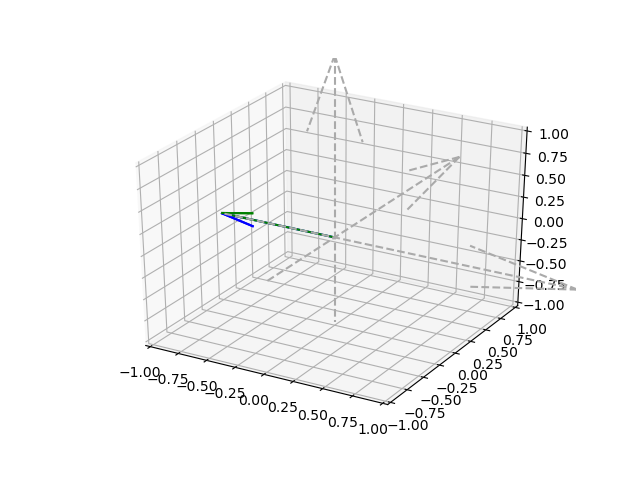

In [31]:
#Vector (q) from Robot
%matplotlib notebook
%matplotlib notebook

quaternions = quaternion_data

InitialPerspectiveVector = [1,0,0]
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, quaternions, InitialPerspectiveVector)

#
fig, ax = plt.subplots(subplot_kw = dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
    
def update10(num, Q, X):
    if (WantToClear):
        ax.clear()
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        x, y, z, u, v, w = get_arrow_q(num, quaternions, InitialPerspectiveVector)
    Qui = ax.quiver([x,x0], [y,y0], [z,z0], [u,u0], [v,v0], [w,w0], length=1, normalize=True, color = ['blue', 'green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['blue', 'green'])  
ani = FuncAnimation(fig, update10, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=2, blit=True, repeat = False)
plt.show()

In [ ]:
#playground

# Notes for myself
### Start the measurement of FSM-9 Sensor
- edit code
- cmake genarate with cmake-gui (on the python2.7 env)
- make the generated files (should work on base env)
- run the .bin file with 'sudo' (!)
- edit the game3d_example code in source
- sudo /home/kuli/Desktop/WeAreVR/fsm9/build/libfree-examples/game3d_example > ~/Desktop/imu_position.csv
(unplug and plug is the best debug)

## UniversalRobot struggles (ur10e)
- Ros2 (galactic)
- UrDriver (for galactic)
- Ros Controller
- setup LAN 

### Start the measurement of robot position
- source /opt/ros/galactic/setup.bash
- ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.35 launch_rviz:=true tool_tcp_port:=50002 
<br> or <br> 
ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.35 launch_rviz:=false tool_tcp_port:=50002 
- put play on the teach panel, wait for command request
- ros2 launch ur_bringup test_scaled_joint_trajectory_controller.launch.py
- ros2 topic echo /joint_states --field position --csv > ~/Desktop/test.csv
or better (absolute angle)
- ros2 run tf2_ros tf2_echo base_link wrist_3_link 500 > ~/Desktop/robot_position.csv

### test
parallel -j 2 -u -- ::: 'sudo /home/kuli/Desktop/WeAreVR/fsm9/build/libfree-examples/game3d_example > ~/Desktop/WeAreVR/Measurements/imu_position2.csv' 'ros2 run tf2_ros tf2_echo base_link wrist_3_link 125  > ~/Desktop/WeAreVR/Measurements/robot_position2.csv'

# TODO
- game_example code src in privat laptop (I guess) - push to git
- game_example code seems to have energy saving mode - need to be dissables, as it makes the measurmensts start with the delay


### Jupyter Notebook struggles
- install lib's using: <br>
import sys <br>
!{sys.executable} -m pip install libx <br>

In [ ]:
import sys
!{sys.executable} -m pip install pyquaternion